In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [3]:
# reading the housing data
df = pd.read_csv(r"C:\Users\Varshni\Downloads\archive\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [4]:
# getting the size of the dataframe
df.shape

(134168, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134168 entries, 0 to 134167
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                134168 non-null  object 
 1   town                 134168 non-null  object 
 2   flat_type            134168 non-null  object 
 3   block                134168 non-null  object 
 4   street_name          134168 non-null  object 
 5   storey_range         134168 non-null  object 
 6   floor_area_sqm       134168 non-null  float64
 7   flat_model           134168 non-null  object 
 8   lease_commence_date  134168 non-null  int64  
 9   remaining_lease      134168 non-null  object 
 10  resale_price         134168 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 11.3+ MB


# Data Preprocessing

In [6]:
# getting the no. of rooms from flat_type
df['no_of_rooms'] = df['flat_type'].str.extract('(\d+)')
df = df.drop('flat_type', axis = 1)
df.head()

,month,town,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,no_of_rooms
0,2017-01,ANG MO KIO,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,2
1,2017-01,ANG MO KIO,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,3
2,2017-01,ANG MO KIO,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,3
3,2017-01,ANG MO KIO,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,3
4,2017-01,ANG MO KIO,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,3


In [7]:
# getting the floor numbers from 'storey_range' column 
df[['min_floor', 'max_floor']] = df['storey_range'].str.split(' TO ', expand = True) 
df = df.drop(['storey_range'], axis = 1) 
df.head()

,month,town,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,no_of_rooms,min_floor,max_floor
0,2017-01,ANG MO KIO,406,ANG MO KIO AVE 10,44.0,Improved,1979,61 years 04 months,232000.0,2,10,12
1,2017-01,ANG MO KIO,108,ANG MO KIO AVE 4,67.0,New Generation,1978,60 years 07 months,250000.0,3,01,03
2,2017-01,ANG MO KIO,602,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,262000.0,3,01,03
3,2017-01,ANG MO KIO,465,ANG MO KIO AVE 10,68.0,New Generation,1980,62 years 01 month,265000.0,3,04,06
4,2017-01,ANG MO KIO,601,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,265000.0,3,01,03


In [8]:
# getting the no. of years from 'remaining_lease' column 
df['years_left'] = df['remaining_lease'].str.extract(r'(\d+) years').astype(int) # digit before years 
df['months_left'] = df['remaining_lease'].str.extract(r'(\d+) month') # digit before months 
df.head()

,month,town,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,no_of_rooms,min_floor,max_floor,years_left,months_left
0,2017-01,ANG MO KIO,406,ANG MO KIO AVE 10,44.0,Improved,1979,61 years 04 months,232000.0,2,10,12,61,04
1,2017-01,ANG MO KIO,108,ANG MO KIO AVE 4,67.0,New Generation,1978,60 years 07 months,250000.0,3,01,03,60,07
2,2017-01,ANG MO KIO,602,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,262000.0,3,01,03,62,05
3,2017-01,ANG MO KIO,465,ANG MO KIO AVE 10,68.0,New Generation,1980,62 years 01 month,265000.0,3,04,06,62,01
4,2017-01,ANG MO KIO,601,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,265000.0,3,01,03,62,05


In [9]:
# fill null values in 'months' column with 0 
df['months_left'] = df['months_left'].fillna(0) 
df['months_left'] = df['months_left'].astype(int)
df.head()

,month,town,block,street_name,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,no_of_rooms,min_floor,max_floor,years_left,months_left
0,2017-01,ANG MO KIO,406,ANG MO KIO AVE 10,44.0,Improved,1979,61 years 04 months,232000.0,2,10,12,61,4
1,2017-01,ANG MO KIO,108,ANG MO KIO AVE 4,67.0,New Generation,1978,60 years 07 months,250000.0,3,01,03,60,7
2,2017-01,ANG MO KIO,602,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,262000.0,3,01,03,62,5
3,2017-01,ANG MO KIO,465,ANG MO KIO AVE 10,68.0,New Generation,1980,62 years 01 month,265000.0,3,04,06,62,1
4,2017-01,ANG MO KIO,601,ANG MO KIO AVE 5,67.0,New Generation,1980,62 years 05 months,265000.0,3,01,03,62,5


In [10]:
# getting the fractional years left 
df['fractional_years'] = df['years_left'] + (df['months_left']/12) 
df['fractional_years'] = round(df['fractional_years'], 2) 
df = df.drop(['remaining_lease', 'years_left', 'months_left'], axis = 1) 
df.head()

,month,town,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,no_of_rooms,min_floor,max_floor,fractional_years
0,2017-01,ANG MO KIO,406,ANG MO KIO AVE 10,44.0,Improved,1979,232000.0,2,10,12,61.33
1,2017-01,ANG MO KIO,108,ANG MO KIO AVE 4,67.0,New Generation,1978,250000.0,3,01,03,60.58
2,2017-01,ANG MO KIO,602,ANG MO KIO AVE 5,67.0,New Generation,1980,262000.0,3,01,03,62.42
3,2017-01,ANG MO KIO,465,ANG MO KIO AVE 10,68.0,New Generation,1980,265000.0,3,04,06,62.08
4,2017-01,ANG MO KIO,601,ANG MO KIO AVE 5,67.0,New Generation,1980,265000.0,3,01,03,62.42


In [11]:
# getting the % of rows with missing values
10642 / len(df) * 100

7.931846640033391

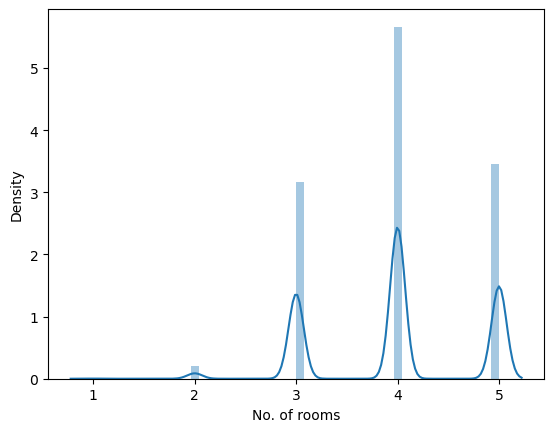

In [12]:
# getting a distribution of the no. of rooms
sns.distplot(df['no_of_rooms'])
plt.xlabel("No. of rooms") 
plt.show()

### Since no. of rooms is a discrete variable that is not normally distributed, we can impute the missing values with mode

In [13]:
df['no_of_rooms'] = df['no_of_rooms'].fillna(df['no_of_rooms'].mode()[0]) 
df.isnull().sum()

month                  0
town                   0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
no_of_rooms            0
min_floor              0
max_floor              0
fractional_years       0
dtype: int64

In [14]:
# converting the deived columns to appropriate data types
df[['min_floor', 'max_floor', 'no_of_rooms']] = df[['min_floor', 'max_floor', 'no_of_rooms']].astype(int)
df.dtypes

month                   object
town                    object
block                   object
street_name             object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price           float64
no_of_rooms              int32
min_floor                int32
max_floor                int32
fractional_years       float64
dtype: object

In [15]:
df.to_excel('Singapore_housing_data_processed.xlsx', index = False)

# Exploratory Data Analysis

In [16]:
df.head()

,month,town,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,no_of_rooms,min_floor,max_floor,fractional_years
0,2017-01,ANG MO KIO,406,ANG MO KIO AVE 10,44.0,Improved,1979,232000.0,2,10,12,61.33
1,2017-01,ANG MO KIO,108,ANG MO KIO AVE 4,67.0,New Generation,1978,250000.0,3,1,3,60.58
2,2017-01,ANG MO KIO,602,ANG MO KIO AVE 5,67.0,New Generation,1980,262000.0,3,1,3,62.42
3,2017-01,ANG MO KIO,465,ANG MO KIO AVE 10,68.0,New Generation,1980,265000.0,3,4,6,62.08
4,2017-01,ANG MO KIO,601,ANG MO KIO AVE 5,67.0,New Generation,1980,265000.0,3,1,3,62.42


In [17]:
df.columns

Index(['month', 'town', 'block', 'street_name', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'no_of_rooms', 'min_floor',
       'max_floor', 'fractional_years'],
      dtype='object')

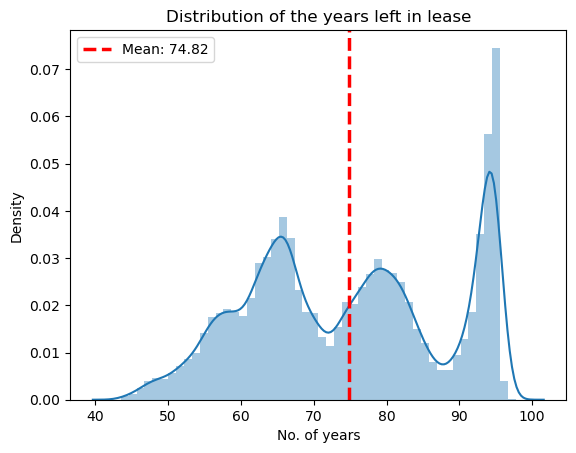

In [49]:
sns.distplot(df['fractional_years'])
mean_years = df['fractional_years'].mean()
plt.axvline(mean_years, color='r', linestyle='--', linewidth=2.5, label=f'Mean: {mean_years:.2f}')
plt.xlabel("No. of years") 
plt.title("Distribution of the years left in lease")
plt.legend()
plt.show()

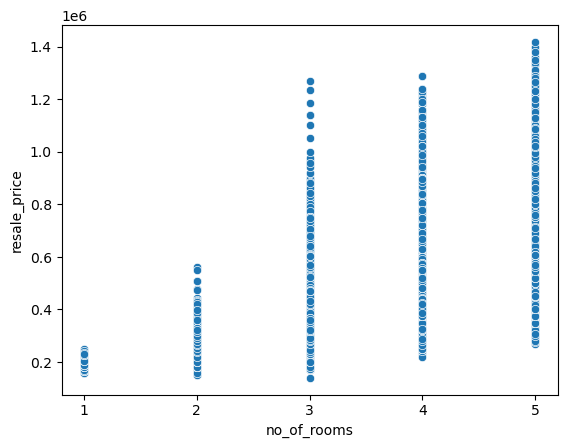

In [19]:
ax = sns.scatterplot(x = 'no_of_rooms', y = 'resale_price', data = df)
ax.set_xticks(range(1,6))

Text(0.5, 1.0, 'Housing Resale Price in Singapore 2017-22')

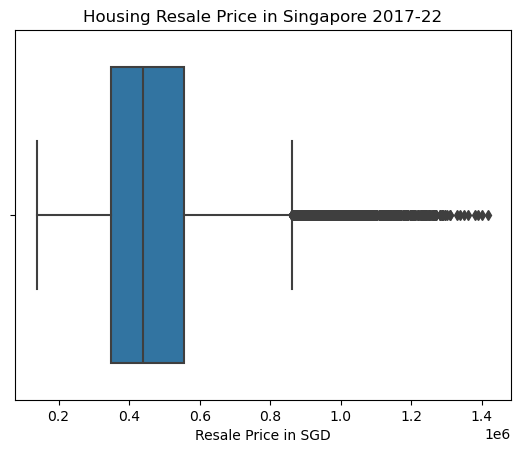

In [50]:
sns.boxplot(x = df['resale_price'])
plt.xlabel("Resale Price in SGD")
plt.title("Housing Resale Price in Singapore 2017-22")

Text(0, 0.5, 'Resale Price (SGD)')

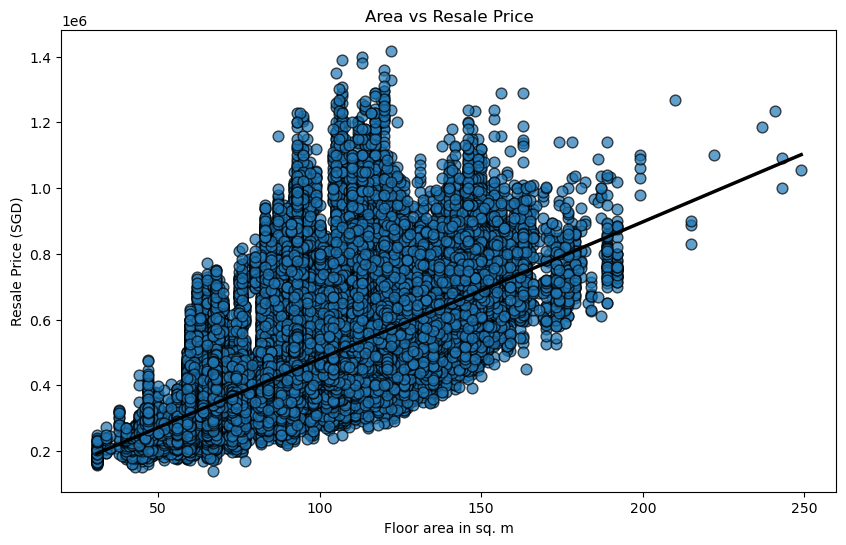

In [21]:
x = df['floor_area_sqm']
y = df['resale_price']

# Initialize layout
fig, ax = plt.subplots(figsize=(10, 6))

# Add scatterplot
ax.scatter(x, y, s=60, alpha=0.7, edgecolors="k")

# Fit linear regression via least squares with numpy.polyfit

# deg=1 means linear fit (i.e. polynomial of degree 1)
b, a = np.polyfit(x, y, deg=1)

# Create sequence of 100 numbers from 0 to 100
xseq = np.linspace(x.min(), x.max())

# Plot regression line
ax.plot(xseq, a + b * xseq, color="k", lw=2.5)

plt.title("Area vs Resale Price") 
plt.xlabel("Floor area in sq. m")
plt.ylabel("Resale Price (SGD)")

In [22]:
df['flat_model'].nunique()

21

In [23]:
# getting the approximate floor location which is the average of min. and max. floor 
df['approx_floor'] = (df['max_floor'] + df['min_floor']) / 2
df.head()

,month,town,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,no_of_rooms,min_floor,max_floor,fractional_years,approx_floor
0,2017-01,ANG MO KIO,406,ANG MO KIO AVE 10,44.0,Improved,1979,232000.0,2,10,12,61.33,11.0
1,2017-01,ANG MO KIO,108,ANG MO KIO AVE 4,67.0,New Generation,1978,250000.0,3,1,3,60.58,2.0
2,2017-01,ANG MO KIO,602,ANG MO KIO AVE 5,67.0,New Generation,1980,262000.0,3,1,3,62.42,2.0
3,2017-01,ANG MO KIO,465,ANG MO KIO AVE 10,68.0,New Generation,1980,265000.0,3,4,6,62.08,5.0
4,2017-01,ANG MO KIO,601,ANG MO KIO AVE 5,67.0,New Generation,1980,265000.0,3,1,3,62.42,2.0


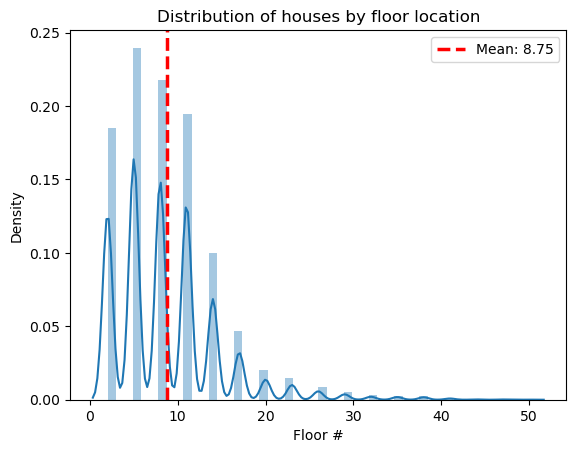

In [24]:
sns.distplot(df['approx_floor'])
avg_floors = df['approx_floor'].mean()
plt.axvline(avg_floors, ls='--', color='r', linewidth=2.5, label=f"Mean: {avg_floors:.2f}")
plt.xlabel("Floor #")
plt.title("Distribution of houses by floor location")
plt.legend()
plt.show()

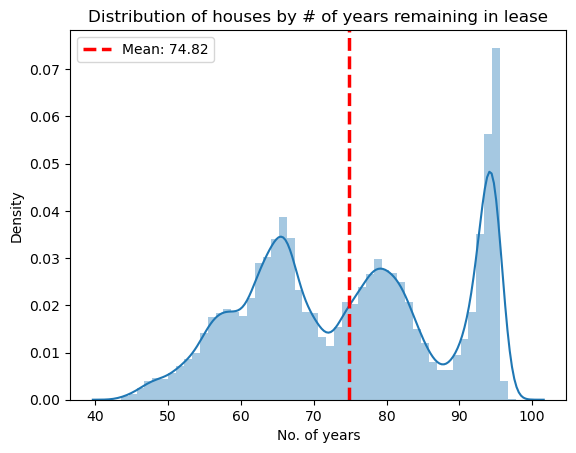

In [25]:
sns.distplot(df['fractional_years'])
avg_years = df['fractional_years'].mean()
plt.axvline(avg_years, color = 'r', linewidth = 2.5, ls = '--', label = f"Mean: {avg_years:.2f}")
plt.xlabel("No. of years") 
plt.title("Distribution of houses by # of years remaining in lease")
plt.legend()
plt.show()

In [26]:
df['resale_price'].corr(df['approx_floor'])

0.36944644132108245

In [27]:
df.columns

Index(['month', 'town', 'block', 'street_name', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'no_of_rooms', 'min_floor',
       'max_floor', 'fractional_years', 'approx_floor'],
      dtype='object')

In [28]:
avg_price_trend = df.groupby(['lease_commence_date','no_of_rooms' ])['resale_price'].mean().reset_index()
df_avg_price_trend = pd.DataFrame(avg_price_trend)
df_avg_price_trend

,lease_commence_date,no_of_rooms,resale_price
0,1966,3,2.259231e+05
1,1967,2,2.152235e+05
2,1967,3,2.678065e+05
3,1967,4,5.756000e+05
4,1968,2,2.183056e+05
...,...,...,...
181,2018,5,7.151729e+05
182,2019,2,4.350000e+05
183,2019,3,6.427857e+05
184,2019,4,9.070909e+05


Text(0, 0.5, 'Average Resale Price (SGD)')

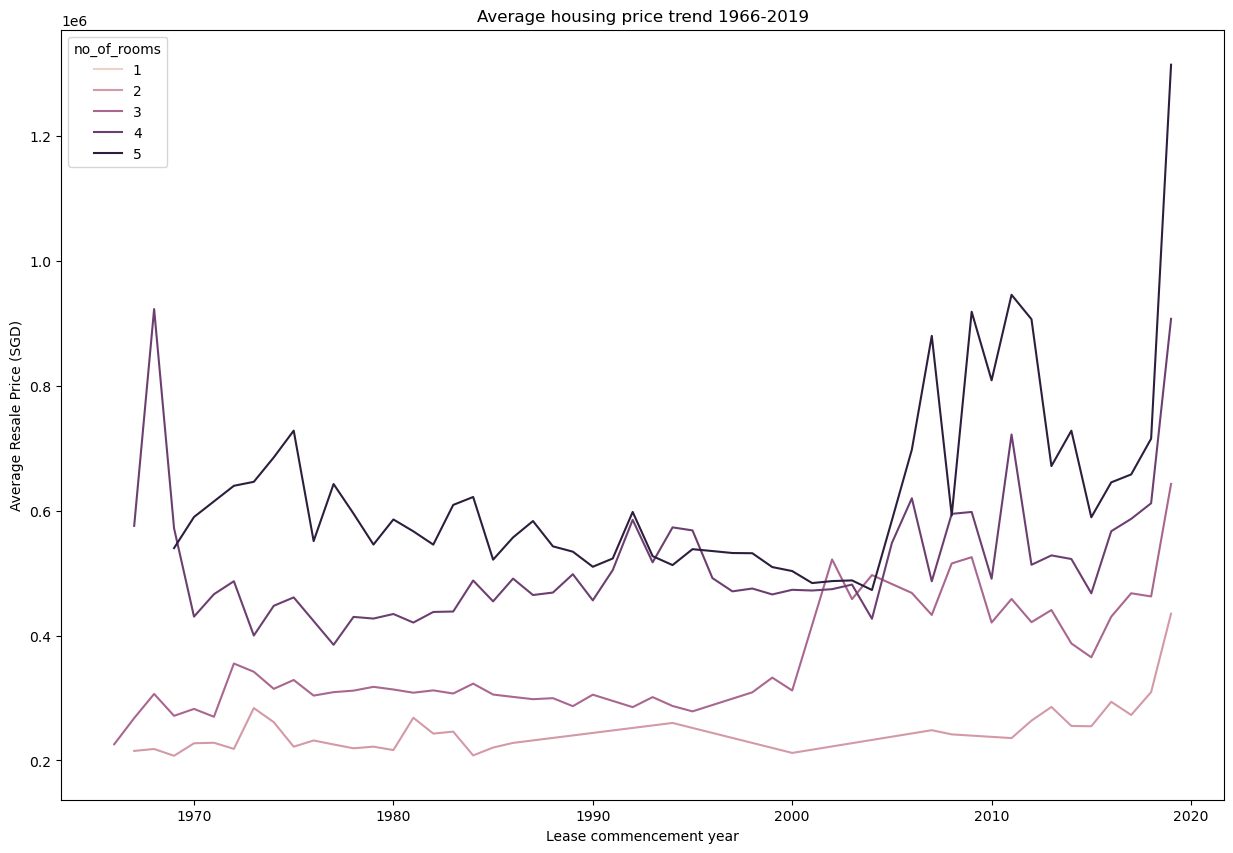

In [29]:
plt.figure(figsize = (15, 10))
plt.title("Average housing price trend 1966-2019")
sns.lineplot(x = "lease_commence_date", y = "resale_price", hue = "no_of_rooms", data = df_avg_price_trend)
plt.xlabel("Lease commencement year") 
plt.ylabel("Average Resale Price (SGD)")

<Axes: xlabel='max_floor', ylabel='resale_price'>

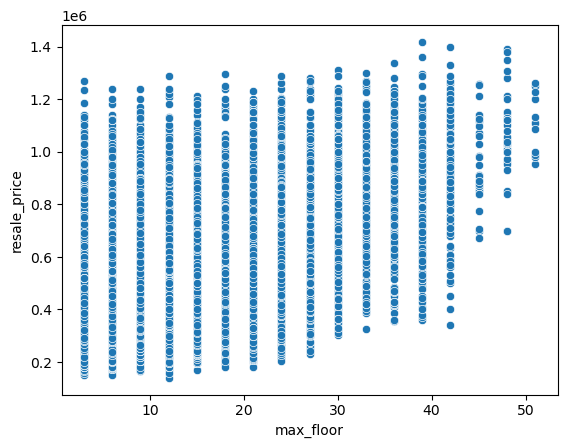

In [30]:
sns.scatterplot( x = "max_floor", y = "resale_price", data = df)

Text(0.5, 1.0, 'Proportion of room count')

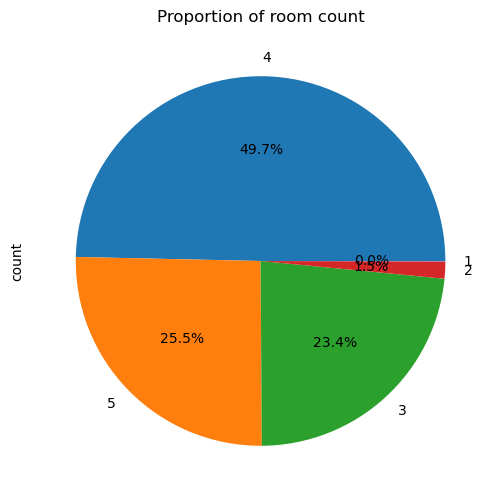

In [53]:
# getting a pie chart of the no. of rooms 
room_counts = df['no_of_rooms'].value_counts()
plt.figure(figsize = (10, 6))
room_counts.plot(kind = 'pie', autopct = "%1.1f%%")
plt.title("Proportion of room count")

# Data Preprocessing and Feature Selection

In [31]:
df['resale_price'].describe()

count    1.341680e+05
mean     4.706689e+05
std      1.629509e+05
min      1.400000e+05
25%      3.500000e+05
50%      4.400000e+05
75%      5.550000e+05
max      1.418000e+06
Name: resale_price, dtype: float64

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label encoding all the categorical variables
for column in df.columns: 
    if df[column].dtype == object: 
        df[column] = le.fit_transform(df[column])


In [33]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()

# standardising y values
y = y.values.reshape(-1, 1) 
y = sc.fit_transform(y)

In [34]:
# defining X and y variables 
y = df['resale_price'] 
X = df.loc[:, (df.columns != 'resale_price') & (df.columns != 'month')]

In [35]:
# selecting the 8 best features 
from sklearn.feature_selection import SelectKBest, f_regression
X_new = SelectKBest(f_regression, k=8).fit_transform(X, y)
X_new.shape

(134168, 8)

In [36]:
from sklearn.model_selection import train_test_split 

# splitting the data into 80% train and 20% test 
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.2, random_state = 42)

# Model Building

In [37]:
!pip install xgboost

In [38]:
def regression_models(X_train, X_test, y_train, y_test): 
    # linear regression 
    from sklearn.linear_model import LinearRegression 
    linear = LinearRegression()
    linear.fit(X_train, y_train) 

    # lasso regression 
    from sklearn.linear_model import Lasso 
    lasso = Lasso()
    lasso.fit(X_train, y_train)

    # ridge regression 
    from sklearn.linear_model import Ridge 
    ridge = Ridge()
    ridge.fit(X_train, y_train) 
    
    #XGBoost Regression
    import xgboost as xgb 
    xgbregressor = xgb.XGBRegressor()

    xgbregressor.fit(X_train, y_train)

    # predicting on test data 
    from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
    
    models = [linear, lasso, ridge, xgbregressor]
    for model in models:
        print("Model: ", str(model))
        y_pred = model.predict(X_test)
        print("MSE:", round(mean_squared_error(y_pred, y_test), 2))
        print("MAE:", round(mean_absolute_error(y_pred, y_test), 2))
        print("R-squared:", round(r2_score(y_test, y_pred), 2))
        print("________________________")

    return y_pred
        

regression_models(X_train, X_test, y_train, y_test)

    

Model:  LinearRegression()
MSE: 11160918056.52
MAE: 79035.97
R-squared: 0.58
________________________
Model:  Lasso()
MSE: 11160918083.08
MAE: 79035.99
R-squared: 0.58
________________________
Model:  Ridge()
MSE: 11160917927.7
MAE: 79035.96
R-squared: 0.58
________________________
Model:  XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parall

array([545128.56, 293829.62, 511068.12, ..., 467078.34, 405583.3 ,
       580641.7 ], dtype=float32)

# Feature Importance

In [39]:
!pip install shap

In [40]:
import shap

In [41]:
import xgboost as xgb
xgbregressor = xgb.XGBRegressor()
xgbregressor.fit(X_train, y_train)
explainer = shap.Explainer(xgbregressor)
shap_values = explainer.shap_values(X_test)


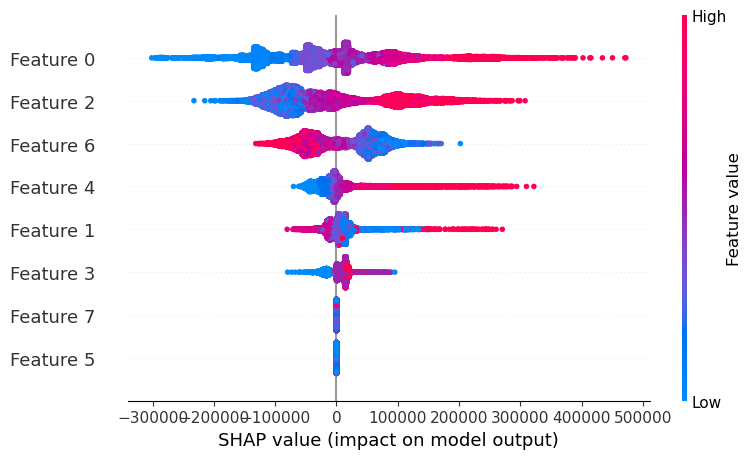

In [42]:
shap.summary_plot(shap_values, X_test)

# Model Deployment

In [43]:
import joblib
joblib.dump(xgbregressor, 'housing_price_prediction.pkl') 

['housing_price_prediction.pkl']

In [44]:
!pip install fastapi

In [45]:
from fastapi import FastAPI
app = FastAPI()

In [46]:
# building the deployment API
deploy_model = joblib.load('housing_price_prediction.pkl')

In [47]:
from fastapi import FastAPI
from pydantic import BaseModel

# Define the request model schema
class RequestModel(BaseModel):
    month: int
    town: int
    block: int
    street_name: int
    floor_area_sqm: float
    flat_model: int
    lease_commence_date: int
    no_of_rooms: int
    min_floor: int
    max_floor: int
    fractional_years: float
    approx_floor: float

    class Config:
        schema_extra = {
            "example": {
                "month": 1,
                "town": 5,
                "block": 20,
                "street_name": 10,
                "floor_area_sqm": 100.5,
                "flat_model": 2,
                "lease_commence_date": 1999,
                "no_of_rooms": 4,
                "min_floor": 2,
                "max_floor": 10,
                "fractional_years": 0.5,
                "approx_floor": 6.0,
            }
        }

# Initialize FastAPI app
app = FastAPI()



In [48]:
# Mock Prediction Endpoint
@app.post("/predict")
async def predict(data: RequestModel):
    # input data for the model
    input_data = [[
        data.month,
        data.town,
        data.block,
        data.street_name,
        data.floor_area_sqm,
        data.flat_model,
        data.lease_commence_date,
        data.no_of_rooms,
        data.min_floor,
        data.max_floor,
        data.fractional_years,
        data.approx_floor
    ]]  

    # Mock prediction
    mock_prediction = 450000

    # Return the predicted resale price
    return {"resale_price": mock_prediction}
